In [1]:
import os, sys
sys.path.insert(0, os.path.abspath(os.path.join("..", "..")))

# Retro hotspotting

TODO: How to tune the parameters?  The weights (and/or bandwidth).

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import open_cp.scripted
import open_cp.scripted.analysis as analysis

In [3]:
loaded = open_cp.scripted.Loader("retro_preds.pic.xz")

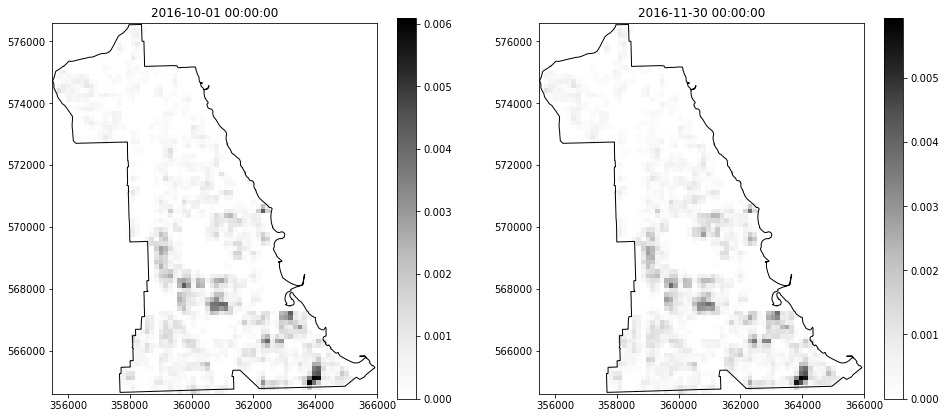

In [4]:
times = [x[1] for x in loaded]
preds = [x[2] for x in loaded]

fig, axes = plt.subplots(ncols=2, figsize=(16,7))
for ax, i in zip(axes, [0, 60]):
    analysis.plot_prediction(loaded, preds[i], ax)
    ax.set_title(times[i])

In [5]:
betas = analysis.hit_counts_to_beta("retro.csv")

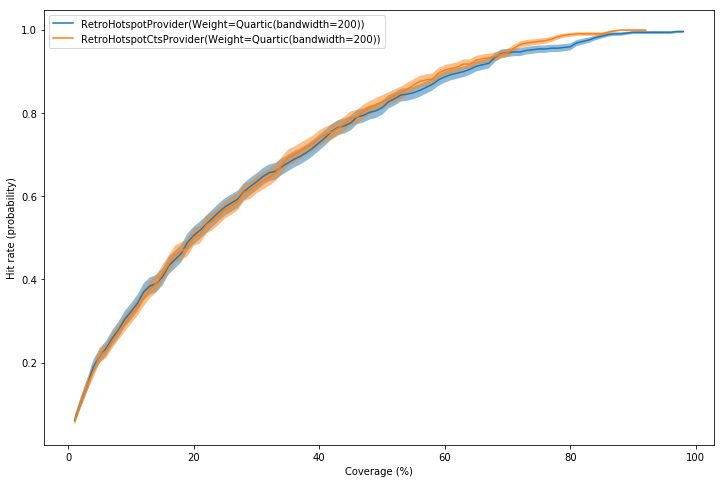

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
analysis.plot_betas(betas, ax)

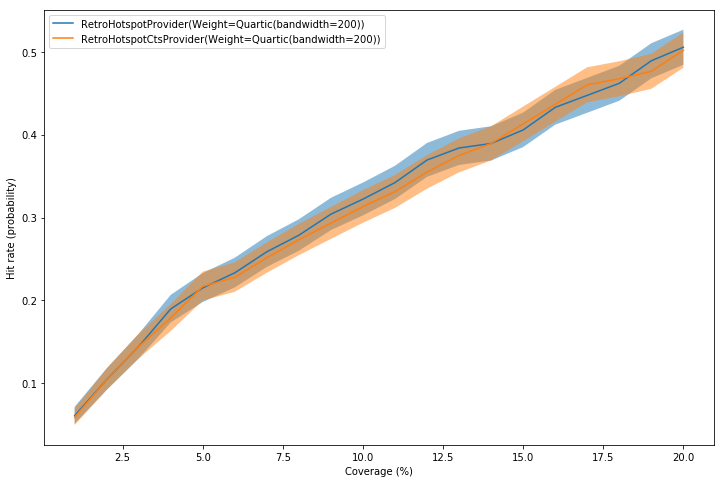

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
analysis.plot_betas(betas, ax, range(1,21))